# Train a Simple TensorFlow Lite for Microcontrollers model

## Setup Environment

Import Dependencies

In [1]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras

# Numpy is a math library
import numpy as np

# Pandas is a data manipulation library 
import pandas as pd

# Matplotlib is a graphing library
import matplotlib.pyplot as plt

# Math is Python's math library
import math

## Configure Defaults

In [2]:
# Folder for all Models
MODELS_DIR = 'models/'

# Go to content Folder and remove models Folder if exists
% cd /content
% rm -rf models

# Make Models Directory
% mkdir -p /content/models

# Define paths to model files
MODEL_TF = MODELS_DIR + 'dnn_sine_model'
MODEL_TFLITE = MODEL_TF + '.tflite'
MODEL_TFLITE_HEADER = MODEL_TF + '.h'

/content


## Dataset

### 1. Generate Data

The code in the following cell will generate a set of random `x` values, calculate their sine values, and display them on a graph.

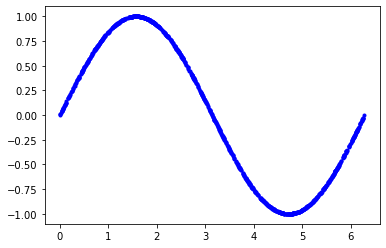

In [3]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

### 2. Add Noise

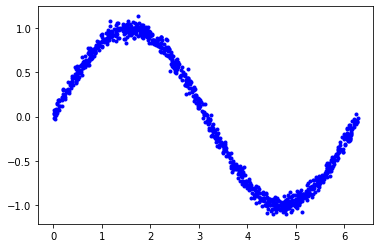

In [4]:
# Add a small random number to each y value
y_values += 0.05 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

### 3. Split the Data

The data is split as follows:
  1. Training: 60%
  2. Validation: 20%
  3. Testing: 20% 

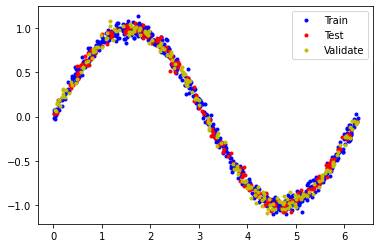

In [5]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


## Training the Model

### 1. Design the Model and Train with Learning Rate Sceduler

In [6]:
# Clear Session and build Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss="mse", metrics=["mae"])

# Learn with Scheduler
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
history = model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_validate, y_validate), callbacks=[lr_schedule])

Epoch 1/500
10/10 [==============================] - 1s 23ms/step - loss: 0.6005 - mae: 0.7043 - val_loss: 0.6265 - val_mae: 0.7164
Epoch 2/500
10/10 [==============================] - 0s 7ms/step - loss: 0.6005 - mae: 0.7043 - val_loss: 0.6265 - val_mae: 0.7164
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6005 - mae: 0.7043 - val_loss: 0.6264 - val_mae: 0.7163
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6005 - mae: 0.7043 - val_loss: 0.6264 - val_mae: 0.7163
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6005 - mae: 0.7043 - val_loss: 0.6264 - val_mae: 0.7163
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6004 - mae: 0.7042 - val_loss: 0.6264 - val_mae: 0.7163
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6004 - mae: 0.7042 - val_loss: 0.6263 - val_mae: 0.7163
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6004 - 

(1e-08, 1.0, 0.0, 1.0)

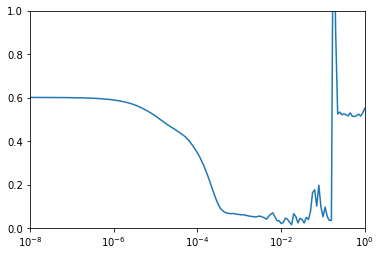

In [7]:
# plot History over Learing Rate
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-0, 0, 1])

In [8]:
# Clear Session and build Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(1,)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-2), loss="mse", metrics=["mae"])

# Learn with best found Learning Rate
history = model.fit(x_train, y_train, epochs=500, batch_size=64, validation_data=(x_validate, y_validate))

# Save the model to disk
model.save(MODEL_TF)

Epoch 1/500
10/10 [==============================] - 1s 21ms/step - loss: 0.7683 - mae: 0.6956 - val_loss: 0.3053 - val_mae: 0.4787
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2465 - mae: 0.4323 - val_loss: 0.1733 - val_mae: 0.3621
Epoch 3/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1506 - mae: 0.3030 - val_loss: 0.1453 - val_mae: 0.2854
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1339 - mae: 0.2719 - val_loss: 0.1322 - val_mae: 0.2800
Epoch 5/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1131 - mae: 0.2468 - val_loss: 0.1160 - val_mae: 0.2546
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.0984 - mae: 0.2230 - val_loss: 0.1031 - val_mae: 0.2370
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.0885 - mae: 0.2131 - val_loss: 0.0894 - val_mae: 0.2007
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 0.0812 - 

7/7 [==============================] - 0s 2ms/step - loss: 0.0040 - mae: 0.0508


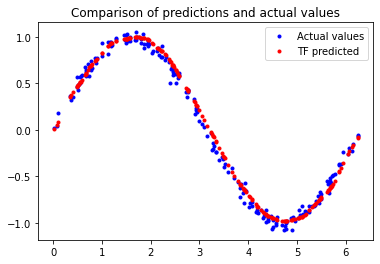

In [9]:
# Calculate and print the loss on our test dataset
test_loss, test_mae = model.evaluate(x_test, y_test)

# Make predictions based on our test dataset
y_test_pred = model.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual values')
plt.plot(x_test, y_test_pred, 'r.', label='TF predicted')
plt.legend()
plt.show()

## Generate a TensorFlow Lite Model

### 1. Generate Models with Quantization

In [10]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)

# Convert the model to the TensorFlow Lite format with quantization
def representative_dataset():
  for i in range(500):
    yield([x_train[i].reshape(1, 1)])
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

28816

### 2. Compare Model Performance

In [11]:
def predict_tflite(tflite_model, x_test):
  # Prepare the test data
  x_test_ = x_test.copy()
  x_test_ = x_test_.reshape((x_test.size, 1))
  x_test_ = x_test_.astype(np.float32)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]
  
  # Invoke the interpreter
  y_pred = np.empty(x_test_.size, dtype=output_details["dtype"])
  for i in range(len(x_test_)):
    interpreter.set_tensor(input_details["index"], [x_test_[i]])
    interpreter.invoke()
    y_pred[i] = interpreter.get_tensor(output_details["index"])[0]

  return y_pred

def evaluate_tflite(tflite_model, x_test, y_true):
  global model
  y_pred = predict_tflite(tflite_model, x_test)
  loss_function = tf.keras.losses.get(model.loss)
  loss = loss_function(y_true, y_pred).numpy()
  return loss

**1. Predictions**

In [13]:
# Calculate predictions
y_test_pred_tf = model.predict(x_test)
y_test_pred_tflite = predict_tflite(model_tflite, x_test)

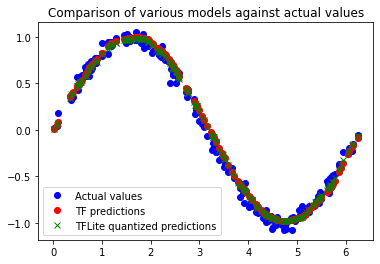

In [14]:
# Compare predictions
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual values')
plt.plot(x_test, y_test_pred_tf, 'ro', label='TF predictions')
plt.plot(x_test, y_test_pred_tflite, 'gx', label='TFLite quantized predictions')
plt.legend()
plt.show()

**2. Loss (MSE/Mean Squared Error)**

In [18]:
# Calculate loss
loss_tf, _ = model.evaluate(x_test, y_test, verbose=0)
loss_tflite = evaluate_tflite(model_tflite, x_test, y_test)

# Compare loss
print('MEAN ABSOLUT ERROR TENSORFLOW:', loss_tf)
print('MEAN ABSOLUT ERROR TF LITE:', loss_tflite)

MEAN ABSOLUT ERROR TENSORFLOW: 0.003999611828476191
MEAN ABSOLUT ERROR TF LITE: 0.0033249795


## Generate a TensorFlow Lite for Microcontrollers Model
Convert the TensorFlow Lite quantized model into a C source file that can be loaded by TensorFlow Lite for Microcontrollers.

In [19]:
# Load TensorFlow Lites C converter
from tensorflow.lite.python.util import convert_bytes_to_c_source

# Convert quantized Model to C Header
source_text, header_text = convert_bytes_to_c_source(model_tflite,  "model")
with  open(MODEL_TFLITE_HEADER,  'w')  as  file:
    file.write('#ifndef MODEL_DATA_H\n#define MODEL_DATA_H\n\n'+source_text+'\n\n#endif //MODEL_DATA_H')

Download all generated Files

In [20]:
# to download generated Files
from google.colab import files

# Download tf lite File
files.download('/content/' + MODEL_TFLITE)

# Download generated Header file
files.download('/content/' + MODEL_TFLITE_HEADER)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>